In [79]:
from elasticsearch import Elasticsearch
import csv

es = Elasticsearch([{'host': 'localhost', 'port': 9200}])

with open('data.csv','r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        es.index(index='index5', body=row)

In [48]:
import pandas as pd

file_path = r"/home/fahim/pro/prediction_hashtag2.csv"
data = pd.read_csv(file_path)

In [49]:
data

,title,article,prediction,hashtag1,hashtag2
0,افزایش نرخ های فروش «خریخت»,به گزارش کدال نگر بورس24 ، شرکت صنایع ریخته گ...,0.0,"میباشد, نرخ, مذبور, مبلغ, میللنگ","نرخ, باشد., مذبور"
1,"روند فروش ""لخزر"" را اینجا ببینید",به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",", ماهه, فروش"
2,"بررسی روند فروش ""غشاذر""",به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",", ماهه, فروش"
3,بلوک 7 درصد «گنگین» عرضه می شود,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند","عرضه, کارگزاری, توسعه"
4,تحقق سود 6 میلیارد تومانی «سنوین» در خرداد ماه,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...,1.0,"خرداد, ارزش, بورس",", خرداد, کرد."
...,...,...,...,...,...
2264,بررسی عملکرد «تکنار» تا پایان شهریور,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",", سود, مجتمع"
2265,تحقق سود 18 میلیارد تومانی در «شرنگی»,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین","سود, صنعتی, شیمیایی"
2266,آیا از تغییرات پرتفوی «ومعادن» خبر دارید؟,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه","شهریور, ارزش, سرمایه"
2267,علت رشد سود «سغرب» چه بود؟,به گزارش کدال نگر بورس24 ، شرکت صنایع سیمان غ...,1.0,"بورس, صنایع, سیمان, غرب, سود","شرکت , صنایع, سیمان"


In [4]:
titles = data["title"]


In [5]:
import re
# الگوی منظم برای جدا کردن کلمات درون « »
pattern = r'«(.*?)»'

# استخراج کلمات با الگوی منظم
extracted_words = []
for title in titles:
    matches = re.findall(pattern, title)
    extracted_words.extend(matches)

# نمایش لیست کلمات استخراج شده
print(extracted_words)


['خریخت', 'گنگین', 'سنوین', 'خریخت', 'ثرود', 'وبهمن', 'ثنظام', 'مادیرا', 'وسپهر', 'غمایه', 'وصنا', 'عالیس', 'رنیک', 'خپارس', 'وامید', 'مرقام', 'غپاک', 'وسینا', 'تپولا', 'کساپا', 'خاور', 'غشهد', 'خمهر', 'وشهر', 'شکبیر', 'فارس', 'رتاپ', 'وآوین', 'غگلپا', 'تکاردن', 'فاذر', 'ثقزوی', 'کاوه', 'پکرمان', 'آپ', 'خکرمان', 'دابور', 'مبین', 'سفارس', 'سخوز', 'دزهراوی', 'غکورش', 'سیتا', 'ثمسکن', 'سیلام', 'وتوصا', 'ساربیل', 'دکپسول', 'جم', 'غفارس', 'شاروم', 'وصنا', 'غشاذر', 'خاور', 'لابسا', 'حشکوه', 'حتوکا', 'تپسی', 'های وب', 'وزمین', 'دتوزیع', 'ثمسکن', 'فنوال', 'وبملت', 'لکما', 'فنفت', 'بپیوند', 'غچین', 'کچاد', 'بکاب', 'فپنتا', 'غالبر', 'ولملت', 'بمیلا', 'سیمرغ', 'تپسی', 'وتعاون', 'سخزر', 'ثجنوب', 'نیرو', 'کگل', 'سفانو', 'شبندر', 'لکما', 'وامید', 'خکار', 'نوری', 'سمگا', 'دفرا', 'پلاسک', 'وصنعت', 'پارسان', 'وبشهر', 'شمواد', 'کزغال', 'دشیمی', 'هرمز', 'ثتران', 'لپارس', 'سیلام', 'ومدیر', 'بکهنوج', 'زشریف', 'غالبر', 'پلاست', 'مرقام', 'آسیاتک', 'عالیس', 'حخزر', 'حبندر', 'شبصیر', 'شپدیس', 'فکمند', 'سقاین',

In [65]:
import pandas as pd
import re

# لیست کلمات مثبت
keywords = [
    "موفقیت",
    "سود",
    "اعتباری",
    "مجوز",
    "ثبت",
    "فروش",
    "توسعه",
    "پیشرفت",
    "ارزش",
    "رشد",
    "مزایده",
    "برتری",
    "تحسین",
    "افزایش",
    "ثبات",
    "ایجاد",
    "بهبود",
    "سرمایه",
    "کسب و کار",
    "مسئولیت",
    "عالی",
    "دارایی",
    "موثر",
    "نمی‌تواند",
    "ندارد",
    "نیست",
    "نمی‌شود",
    "خیر",
    "ناراضی",
    "ناکام",
    "بی‌اعتنا",
    "ضعیف",
    "ناامید",
    "نادرست",
    "ناکارآمد",
    "ناراحت",
    "بدون نتیجه",
    "بدبختی",
    "ناروا",
    "ناپسند",
    "نارسا",
    "بی‌اهمیت",
    "ناکامی",
    "بی‌ارزش",
    "ناخوش‌ایند",
    "ناروا",
    "بد",
    "ناسازگار",
    "ناکافی",
    "بی‌اعتبار",
    "ناکامی",
    "ناامیدی",
    "بی‌حاصل",
    "نادرست",
    "نافرمانی",
    "ناکارآمدی",
    "بدبختی",
    "ناپایدار",
    "ناراضی‌کننده",
    "ناپرهیزگار",
    "بی‌انگیزه",
    "ناسازگاری",
    "ناکارآمدی",
    "بی‌خبری",
    "نارضایت",
    "ناپذیرفته",
    "ناپایدار",
    "بی‌عدالتی",
    "نادرست",
    "ناکارا",
    "ناکامی",
    "بی‌اعتمادی",
    "ناپرهیزگاری",
    "ناراضی‌کننده",
    "ناپذیرفته",
    "بی‌امیدی",
    "ناسازگاری",
    "نادرستی",
    "ناپسند",
    "بی‌ارزش",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌شکیبایی",
    "ناپایداری",
    "نارضایتی",
    "ناپذیرفته",
    "بی‌حوصلگی",
    "نادرستی",
    "ناکارا",
    "بی‌اهمیتی",
    "ناروا",
    "بی‌عزتی",
    "ناپایداری",
    "نارضایتی",
    "ناپذیرفته",
    "بی‌ملاحظه",
    "ناسازگاری",
    "نادرستی",
    "ناکارا",
    "بی‌تفاوتی",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌هیچ‌وقت",
    "ناپایداری",
    "نارضایتی",
    "ناپذیرفته",
    "بی‌ادبی",
    "ناسازگاری",
    "نادرستی",
    "ناکارا",
    "بی‌مبالات",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌باکی",
    "ناپذیرفته",
    "بی‌احترامی",
    "ناسازگاری",
    "نادرستی",
    "ناکارا",
    "بی‌اندازه",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌توجهی",
    "ناپایداری",
    "نارضایتی",
]


# تابع برای استخراج کلمات کلیدی از متن
def extract_keywords(text):
    matches = re.findall(r'\b(?:' + '|'.join(keywords) + r')\b', text)
    return ', '.join(matches)


# اطمینان حاصل کنید که داده‌ها در ستون 'hashtag2' به فرمت string باشند
data['hashtag2'] = data['hashtag2'].astype(str)

# استفاده از تابع برای ایجاد ستون جدید با کلمات کلیدی و حذف کلمات غیر از کلمات کلیدی از ستون 'hashtag2'
data['hashtag2'] = data['hashtag2'].apply(extract_keywords)

# نمایش داده‌ها
print(data)


       title                                            article  prediction   
0      خریخت  به گزارش کدال نگر بورس24 ، شرکت  صنایع ریخته گ...         0.0  \
1        خزر  به گزارش کدال نگر بورس24 ، شرکت   صنعتی پارس خ...         1.0   
2      غشاذر  به گزارش کدال نگر بورس24 ، شرکت  شیر پاستوریزه...         1.0   
3      گنگین  به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...         0.0   
4      سنوین  به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...         1.0   
...      ...                                                ...         ...   
2264   تکنار  به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...         1.0   
2265   شرنگی  به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...         1.0   
2266  ومعادن  به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...         0.0   
2267    سغرب  به گزارش کدال نگر بورس24 ، شرکت  صنایع سیمان غ...         1.0   
2268      ما  به گزارش کدال نگر بورس24 ، شرکت گروه توسعه مال...         1.0   

                               hashtag1      hashta

In [66]:
data['hashtag2']

0                   
1               فروش
2               فروش
3              توسعه
4                   
            ...     
2264             سود
2265             سود
2266    ارزش, سرمایه
2267                
2268           توسعه
Name: hashtag2, Length: 2269, dtype: object

In [67]:
data

,title,article,prediction,hashtag1,hashtag2
0,خریخت,به گزارش کدال نگر بورس24 ، شرکت صنایع ریخته گ...,0.0,"میباشد, نرخ, مذبور, مبلغ, میللنگ",
1,خزر,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
2,غشاذر,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند",توسعه
4,سنوین,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...,1.0,"خرداد, ارزش, بورس",
...,...,...,...,...,...
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",سود
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین",سود
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه","ارزش, سرمایه"
2267,سغرب,به گزارش کدال نگر بورس24 ، شرکت صنایع سیمان غ...,1.0,"بورس, صنایع, سیمان, غرب, سود",


In [7]:
import re
import pandas as pd

# الگوی منظم برای جدا کردن کلمات درون « »
pattern = r'«(.*?)»'

# استخراج کلمات با الگوی منظم و اضافه کردن به هر سطر
data['title'] = data['title'].apply(lambda title: ', '.join(re.findall(pattern, title)))

# نمایش داده‌ها
print(data)


       title                                            article  prediction   
0      خریخت  به گزارش کدال نگر بورس24 ، شرکت  صنایع ریخته گ...         0.0  \
1             به گزارش کدال نگر بورس24 ، شرکت   صنعتی پارس خ...         1.0   
2             به گزارش کدال نگر بورس24 ، شرکت  شیر پاستوریزه...         1.0   
3      گنگین  به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...         0.0   
4      سنوین  به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...         1.0   
...      ...                                                ...         ...   
2264   تکنار  به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...         1.0   
2265   شرنگی  به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...         1.0   
2266  ومعادن  به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...         0.0   
2267    سغرب  به گزارش کدال نگر بورس24 ، شرکت  صنایع سیمان غ...         1.0   
2268   ومهان  به گزارش کدال نگر بورس24 ، شرکت گروه توسعه مال...         1.0   

                               hashtag1 hashtag2  


In [8]:
data

,title,article,prediction,hashtag1,hashtag2
0,خریخت,به گزارش کدال نگر بورس24 ، شرکت صنایع ریخته گ...,0.0,"میباشد, نرخ, مذبور, مبلغ, میللنگ",
1,,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
2,,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند",عرضه
4,سنوین,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...,1.0,"خرداد, ارزش, بورس",
...,...,...,...,...,...
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",سود
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین",سود
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه",
2267,سغرب,به گزارش کدال نگر بورس24 ، شرکت صنایع سیمان غ...,1.0,"بورس, صنایع, سیمان, غرب, سود",


In [68]:
empty_title_count = data['title'].isnull().sum()
print("تعداد داده‌های خالی در ستون title:", empty_title_count)


تعداد داده‌های خالی در ستون title: 101


In [12]:
data.dropna(subset=['title'], inplace=True)

In [13]:
data

,title,article,prediction,hashtag1,hashtag2
0,خریخت,به گزارش کدال نگر بورس24 ، شرکت صنایع ریخته گ...,0.0,"میباشد, نرخ, مذبور, مبلغ, میللنگ",
1,,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
2,,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند",عرضه
4,سنوین,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...,1.0,"خرداد, ارزش, بورس",
...,...,...,...,...,...
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",سود
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین",سود
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه",
2267,سغرب,به گزارش کدال نگر بورس24 ، شرکت صنایع سیمان غ...,1.0,"بورس, صنایع, سیمان, غرب, سود",


In [14]:
data.to_csv('data.csv', index=False)

In [16]:
# بررسی تعداد داده‌های خالی در هر ستون
print(data.isnull().sum())


title         0
article       1
prediction    0
hashtag1      0
hashtag2      0
dtype: int64


In [69]:
data = data.drop(data[data['title'] == ''].index)
data = data.drop(data[data['hashtag2'] == ''].index)

In [70]:
data

,title,article,prediction,hashtag1,hashtag2
1,خزر,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
2,غشاذر,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند",توسعه
6,ثرود,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری م...,1.0,"بورس, سرمایه, مسکن, زایندهرود, ماهه",سرمایه
7,وبهمن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ...,0.0,"سرمایه, بهمن, , بورس, عرضه",سرمایه
...,...,...,...,...,...
2262,ما,به گزارش کدال نگر بورس24 ، درآمد های عملیاتی و...,0.0,"عملیاتی, سود, ماهه, رسیده_است",سود
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",سود
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین",سود
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه","ارزش, سرمایه"


In [74]:
import pandas as pd

# تبدیل ستون "title" به لیست
titles_list = data['title'].tolist()

# تعداد تکرار هر کلمه را به دست آورید
word_counts = {}
for title in titles_list:
    words = title.split(', ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# نمایش کلمات و تعداد تکرار آن‌ها
for word, count in word_counts.items():
    print(f"{word}: {count}")


AttributeError: 'NoneType' object has no attribute 'split'

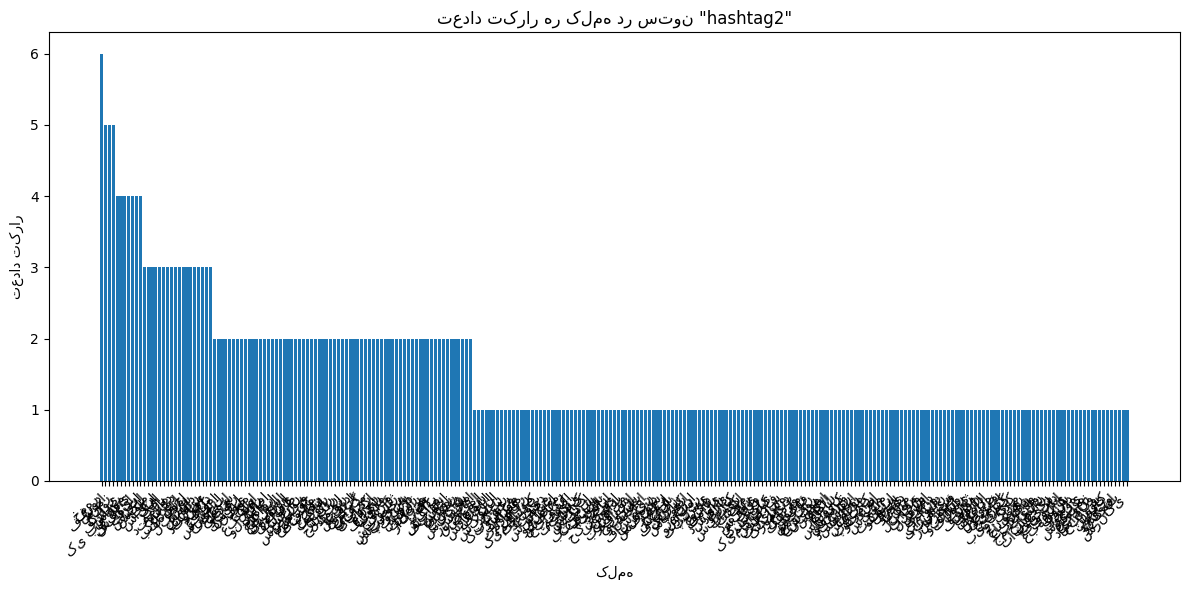

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# تبدیل ستون "title" به لیست
titles_list = data['title'].tolist()

# تعداد تکرار هر کلمه را به دست آورید
word_counts = {}
for title in titles_list:
    words = title.split(', ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# تبدیل دیکشنری به دیتافریم
word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])

# مرتب سازی بر اساس تعداد تکرار کلمات به صورت نزولی
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

# رسم نمودار نواری
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['word'], word_counts_df['count'])
plt.xlabel('کلمه')
plt.ylabel('تعداد تکرار')
plt.title('تعداد تکرار هر کلمه در ستون "hashtag2"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
# دیکشنری جهت تبدیل مقادیر ستون "hashtag2"
replace_dict = {
    'افزایش': 1,
    'عرضه': 1,
    'سود': 1,
    'خرید': 1,
    'کاهش': 0,
    'ضرر': 0,
    'فروش': 0
}

# اعمال تغییرات با استفاده از دیکشنری
data['hashtag2'] = data['hashtag2'].replace(replace_dict)


       title                                            article  prediction   
3      گنگین  به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...         0.0  \
19     خپارس  به گزارش کدال نگر بورس24 ، شرکت پارس خودرو از ...         1.0   
24      غپاک  به گزارش کدال نگر بورس24 ، شرکت لبنیات پاستوری...         0.0   
33      خمهر  به گزارش کدال نگر بورس24 ، شرکت مهرکام پارس در...         0.0   
35      وشهر  به گزارش کدال نگر بورس24 ، بانک شهر اعلام داشت...         0.0   
...      ...                                                ...         ...   
2252   شکربن  به گزارش کدال نگر بورس24 ، شرکت کربن ایران در ...         0.0   
2258  دتوزیع  به گزارش کدال نگر بورس24 ،شرکت توزیع داروپخش د...         1.0   
2259  دتولید  به گزارش کدال نگر بورس24 ، شرکت داروسازی تولید...         0.0   
2264   تکنار  به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...         1.0   
2265   شرنگی  به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...         1.0   

                                hashtag1  hashtag2 

In [76]:
# لیست کلمات مثبت
positive_words = [
    "موفقیت",
    "سود",
    "اعتباری",
    "مجوز",
    "ثبت",
    "فروش",
    "توسعه",
    "پیشرفت",
    "ارزش",
    "رشد",
    "مزایده",
    "زنجان",
    "برتری",
    "تحسین",
    "افزایش",
    "ثبات",
    "ایجاد",
    "بهبود",
    "سرمایه",
    "کسب و کار",
    "مسئولیت",
    "عالی",
    "دارایی",
    "موثر"
]

# لیست کلمات منفی
negative_words = [
    "نمی‌تواند",
    "ندارد",
    "نیست",
    "نمی‌شود",
    "خیر",
    "ناراضی",
    "ناکام",
    "بی‌اعتنا",
    "ضعیف",
    "ناامید",
    "نادرست",
    "ناکارآمد",
    "ناراحت",
    "بدون نتیجه",
    "بدبختی",
    "ناروا",
    "ناپسند",
    "نارسا",
    "بی‌اهمیت",
    "ناکامی",
    "بی‌ارزش",
    "ناخوش‌ایند",
    "ناروا",
    "بد",
    "ناسازگار",
    "ناکافی",
    "بی‌اعتبار",
    "ناکامی",
    "ناامیدی",
    "بی‌حاصل",
    "نادرست",
    "نافرمانی",
    "ناکارآمدی",
    "بدبختی",
    "ناپایدار",
    "ناراضی‌کننده",
    "ناپرهیزگار",
    "بی‌انگیزه",
    "ناسازگاری",
    "ناکارآمدی",
    "بی‌خبری",
    "نارضایت",
    "ناپذیرفته",
    "ناپایدار",
    "بی‌عدالتی",
    "نادرست",
    "ناکارا",
    "ناکامی",
    "بی‌اعتمادی",
    "ناپرهیزگاری",
    "ناراضی‌کننده",
    "ناپذیرفته",
    "بی‌امیدی",
    "ناسازگاری",
    "نادرستی",
    "ناپسند",
    "بی‌ارزش",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌شکیبایی",
    "ناپایداری",
    "نارضایتی",
    "ناپذیرفته",
    "بی‌حوصلگی",
    "نادرستی",
    "ناکارا",
    "بی‌اهمیتی",
    "ناروا",
    "بی‌عزتی",
    "ناپایداری",
    "نارضایتی",
    "ناپذیرفته",
    "بی‌ملاحظه",
    "ناسازگاری",
    "نادرستی",
    "ناکارا",
    "بی‌تفاوتی",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌هیچ‌وقت",
    "ناپایداری",
    "نارضایتی",
    "ناپذیرفته",
    "بی‌ادبی",
    "نادرستی",
    "ناکارا",
    "بی‌مبالات",
    "ناروا",
    "ناکافی",
    "ناکارآمد",
    "بی‌باکی",
    "ناپذیرفته",
    "بی‌احترامی",
    "ناسازگاری",
    "نادرستی",
    "بی‌اندازه",
    "ناروا",
    "ناکارآمد",
    "بی‌توجهی",
    "ناپایداری",
    "نارضایتی",
]


# تابع برای تعیین مقدار ستون "hashtag2"
def label_hashtag2(word):
    if word in positive_words:
        return 'سود'
    elif word in negative_words:
        return 'ضرر'
    else:
        return None

# اعمال تابع بر روی ستون "hashtag2"
data['hashtag2'] = data['hashtag2'].apply(label_hashtag2)


In [77]:
data

,title,article,prediction,hashtag1,hashtag2
1,خزر,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",سود
2,غشاذر,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",سود
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند",سود
6,ثرود,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری م...,1.0,"بورس, سرمایه, مسکن, زایندهرود, ماهه",سود
7,وبهمن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ...,0.0,"سرمایه, بهمن, , بورس, عرضه",سود
...,...,...,...,...,...
2262,ما,به گزارش کدال نگر بورس24 ، درآمد های عملیاتی و...,0.0,"عملیاتی, سود, ماهه, رسیده_است",سود
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",سود
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین",سود
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه",None


In [33]:
data.to_csv('data.csv', index=False)

In [50]:
import pandas as pd
file_path = r"/home/fahim/pro/list1.csv"
df = pd.read_csv(file_path)

In [51]:
df

,نام نماد,نام بازار,تابلو,نام شرکت,نام صنعت
0,آ س پ,فرابورس,بازار اول,آ.س.پ,انبوه سازی، املاك و مستغلات
1,آبادا,بازار دوم,بورس,تولید نیروی برق آبادان,عرضه برق، گاز، بخاروآب گرم
2,آبین,فرابورس,بازار پایه (تابلوی زرد),کشت و صنعت آبشیرین,زراعت و خدمات وابسته
3,آرمان,فرابورس,بازار پایه (تابلوی زرد),بیمه آرمان,بیمه وصندوق بازنشستگی به جزتامین اجتماعی
4,آریا,فرابورس,بازار دوم,پلیمر آریا ساسول,محصولات شیمیایی
...,...,...,...,...,...
714,گنگین,فرابورس,بازار پایه (تابلوی زرد),اقتصادی نگین گردشگری ایرانیان,هتل و رستوران
715,گوهران,فرابورس,بازار دوم,سرمایه گذاری توسعه گوهران امید,سرمایه گذاریها
716,گپارس,فرابورس,بازار پایه (تابلوی زرد),امور رفاهی کارگزاران پارس,هتل و رستوران
717,گکوثر,فرابورس,بازار دوم,هتل پارسیان کوثر اصفهان,هتل و رستوران


In [54]:
df = df["نام نماد"]

In [55]:
df

0       آ س پ
1       آبادا
2        آبین
3       آرمان
4        آریا
        ...  
714     گنگین
715    گوهران
716     گپارس
717     گکوثر
718      گکیش
Name: نام نماد, Length: 719, dtype: object

In [56]:
titles = data["title"]

In [57]:
titles

0                          افزایش نرخ های فروش «خریخت»
1                     روند فروش "لخزر" را اینجا ببینید
2                              بررسی روند فروش "غشاذر"
3                      بلوک 7 درصد «گنگین» عرضه می شود
4       تحقق سود 6 میلیارد تومانی «سنوین» در خرداد ماه
                             ...                      
2264              بررسی عملکرد «تکنار» تا پایان شهریور
2265             تحقق سود 18 میلیارد تومانی در «شرنگی»
2266         آیا از تغییرات پرتفوی «ومعادن» خبر دارید؟
2267                        علت رشد سود «سغرب» چه بود؟
2268     تحقق سود 19 میلیارد تومانی «ومهان» در مهر ماه
Name: title, Length: 2269, dtype: object

In [58]:
values_list = df.values.tolist()

In [59]:
values_list

['آ س پ',
 'آبادا',
 'آبین',
 'آرمان',
 'آریا',
 'آریان',
 'آسیا',
 'آواپارس',
 'آپ',
 'آکنتور',
 'آینده',
 'اتکاسا',
 'اتکام',
 'اتکای',
 'اخابر',
 'اردستان',
 'ارفع',
 'استقلال',
 'اسیاتک',
 'اعتلا',
 'افرا',
 'افق',
 'البرز',
 'امید',
 'امین',
 'انتخاب',
 'انرژی۱',
 'انرژی۳',
 'اوان',
 'اپال',
 'اپرداز',
 'باران',
 'بالاس',
 'بالبر',
 'بایکا',
 'بترانس',
 'بتک',
 'بجهرم',
 'بخاور',
 'برکت',
 'بزاگرس',
 'بساما',
 'بسویچ',
 'بشهاب',
 'بفجر',
 'بموتو',
 'بمپنا',
 'بمیلا',
 'بنو',
 'بنیرو',
 'بهپاک',
 'بهیر',
 'بورس',
 'بوعلی',
 'بپاس',
 'بپیوند',
 'بکاب',
 'بکابل',
 'بکام',
 'بکهنوج',
 'بگیلان',
 'تابا',
 'تاتمس',
 'تاصیکو',
 'تاپکیش',
 'تاپیکو',
 'تایرا',
 'تبرک',
 'تجلی',
 'تشتاد',
 'تفارس',
 'تفیرو',
 'تلیسه',
 'تماوند',
 'تمحرکه',
 'تملت',
 'تنوین',
 'توریل',
 'توسعه',
 'توسن',
 'تپسی',
 'تپمپی',
 'تپولا',
 'تپکو',
 'تکشا',
 'تکمبا',
 'تکنار',
 'تکنو',
 'تیپیکو',
 'ثاباد',
 'ثاخت',
 'ثاصفا',
 'ثالوند',
 'ثامان',
 'ثامید',
 'ثاژن',
 'ثباغ',
 'ثبهساز',
 'ثتران',
 'ثتوسا',
 'ثجنوب',
 

In [38]:
print(type(df))


<class 'pandas.core.series.Series'>


In [60]:
import pandas as pd


# تابع کاستمی برای جستجوی مقادیر از values_list
def find_match(row):
    for value in values_list:
        if value in row:
            return value
    return None

# استفاده از تابع apply برای اعمال تابع کاستمی بر روی ستون "title"
data["title"] = data["title"].apply(find_match)

# نمایش دیتافریم با مقادیر به‌روز شده
print(data)


       title                                            article  prediction   
0      خریخت  به گزارش کدال نگر بورس24 ، شرکت  صنایع ریخته گ...         0.0  \
1        خزر  به گزارش کدال نگر بورس24 ، شرکت   صنعتی پارس خ...         1.0   
2      غشاذر  به گزارش کدال نگر بورس24 ، شرکت  شیر پاستوریزه...         1.0   
3      گنگین  به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...         0.0   
4      سنوین  به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...         1.0   
...      ...                                                ...         ...   
2264   تکنار  به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...         1.0   
2265   شرنگی  به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...         1.0   
2266  ومعادن  به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...         0.0   
2267    سغرب  به گزارش کدال نگر بورس24 ، شرکت  صنایع سیمان غ...         1.0   
2268      ما  به گزارش کدال نگر بورس24 ، شرکت گروه توسعه مال...         1.0   

                               hashtag1            

In [61]:
data

,title,article,prediction,hashtag1,hashtag2
0,خریخت,به گزارش کدال نگر بورس24 ، شرکت صنایع ریخته گ...,0.0,"میباشد, نرخ, مذبور, مبلغ, میللنگ","نرخ, باشد., مذبور"
1,خزر,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",", ماهه, فروش"
2,غشاذر,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",", ماهه, فروش"
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند","عرضه, کارگزاری, توسعه"
4,سنوین,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ا...,1.0,"خرداد, ارزش, بورس",", خرداد, کرد."
...,...,...,...,...,...
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",", سود, مجتمع"
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین","سود, صنعتی, شیمیایی"
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه","شهریور, ارزش, سرمایه"
2267,سغرب,به گزارش کدال نگر بورس24 ، شرکت صنایع سیمان غ...,1.0,"بورس, صنایع, سیمان, غرب, سود","شرکت , صنایع, سیمان"


In [44]:
import pandas as pd


# تقسیم مقادیر ستون "hashtag2" به کلمات با استفاده از فاصله به عنوان جداکننده
data["hashtag2"] = data["hashtag2"].str.split()

# تبدیل لیست‌های کلمات به ردیف‌های مجزا
data = data.explode("hashtag2")

# نمایش تمام کلمات موجود در ستون "hashtag2"
print(data["hashtag2"].tolist())


['نرخ,', 'باشد.,', 'مذبور', ',', 'ماهه,', 'فروش', ',', 'ماهه,', 'فروش', 'عرضه,', 'کارگزاری,', 'توسعه', ',', 'خرداد,', 'کرد.', 'هیأت,', 'مدیره,', 'صنایع', 'سرمایه,', 'مسکن,', 'زاینده', 'سرمایه,', 'بهمن,', 'شرکت', 'شرکت', ',', 'سرمایه,', 'ساختمانی', 'زمین,', 'صنایع,', 'مادیران', 'سرمایه,', 'شرکت', ',', 'گروه', 'شرکت', ',', 'خمیر,', 'مایه', 'فروش,', 'مبلغ,', 'شرکت', 'قند,', 'هکمتان,', 'جزئیات', 'سرمایه,', 'صنایع,', 'بهشهر', 'سازمان,', 'بورس,', 'مجوز', 'شرکت', ',', 'جنرال,', 'مکانیک', ',', 'ماهه,', 'مبلغ', '1ماهه,', 'فروش,', 'مبلغ', 'پارس,', 'خودرو,', 'افزایش', 'گروه,', 'مدیریت,', 'سرمایه', 'ایران,', 'ارقام,', 'معاملات', 'خرداد,', 'درآمد,', 'فروش', 'بیمه,', ',', 'ماهه', 'فروش,', 'لبنیات,', 'پاستوریزه', 'بانک,', ',', 'ماهه', 'شرکت', ',', 'مهندسی,', 'مرآت', 'شرکت', ',', 'سایپا,', 'شیشه', 'درآمد,', 'بود.,', 'بورس', 'ایران,', 'خودرو,', 'دیزل', 'شهد,', 'ایران,', 'مهندسی,', 'نیپک,', 'فرعی', 'فروش,', ',', 'ماهه', 'فروش,', 'مهرکام,', 'پارس', 'فروش,', 'تامین,', 'سرمایه', 'مزایده,', 'پیشنهاد,', 'فرو

In [78]:
data.to_csv('data.csv', index=False)

In [71]:
data

,title,article,prediction,hashtag1,hashtag2
1,خزر,به گزارش کدال نگر بورس24 ، شرکت صنعتی پارس خ...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
2,غشاذر,به گزارش کدال نگر بورس24 ، شرکت شیر پاستوریزه...,1.0,"ماهه, فروش, مبلغ, بورس",فروش
3,گنگین,به گزارش کدال نگر بورس24 ، شرکت کارگزاری توسعه...,0.0,"عرضه, بورس, کارگزاری, توسعه, سهند",توسعه
6,ثرود,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری م...,1.0,"بورس, سرمایه, مسکن, زایندهرود, ماهه",سرمایه
7,وبهمن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ...,0.0,"سرمایه, بهمن, , بورس, عرضه",سرمایه
...,...,...,...,...,...
2262,ما,به گزارش کدال نگر بورس24 ، درآمد های عملیاتی و...,0.0,"عملیاتی, سود, ماهه, رسیده_است",سود
2264,تکنار,به گزارش کدال نگر بورس24 ، شرکت مجتمع معادن مس...,1.0,"سود, بورس, مجتمع, معادن, تکنار",سود
2265,شرنگی,به گزارش کدال نگر بورس24 ، شرکت صنعتی و شیمیای...,1.0,"سود, بورس, صنعتی, شیمیایی, رنگین",سود
2266,ومعادن,به گزارش کدال نگر بورس24 ، شرکت سرمایه گذاری ت...,0.0,"شهریور, ارزش, بورس, سرمایه, توسعه","ارزش, سرمایه"
